# BERT  Classification Model

In [1]:
!pip install tensorflow

In [2]:
!pip3 install tensorflow_hub
!pip3 install tensorflow_text

In [3]:
!pip install scikit-learn==1.1.3

In [4]:
pip show scikit-learn

Name: scikit-learn
Version: 1.1.3
Summary: A set of python modules for machine learning and data mining
Home-page: http://scikit-learn.org
Author: None
Author-email: None
License: new BSD
Location: /Users/summerzhao/opt/anaconda3/lib/python3.8/site-packages
Requires: numpy, threadpoolctl, scipy, joblib
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [5]:
!pip3 install -U scikit-learn scipy matplotlib

Requirement already up-to-date: scikit-learn in /Users/summerzhao/opt/anaconda3/lib/python3.8/site-packages (1.1.3)
Requirement already up-to-date: scipy in /Users/summerzhao/opt/anaconda3/lib/python3.8/site-packages (1.9.3)
Requirement already up-to-date: matplotlib in /Users/summerzhao/opt/anaconda3/lib/python3.8/site-packages (3.6.2)


In [6]:
import pandas as pd
import numpy as np

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

from transformers import TFBertModel
from transformers import BertTokenizer

from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from tqdm.auto import tqdm
import matplotlib.pyplot as plt
import seaborn as sns

## Cleaning

In [7]:
df = pd.read_csv("annotated_qs_3.csv")
df_filtered = df.copy()
df_filtered = df_filtered.fillna(0)
df_filtered

,call_question_id,question_text,cyear,Open-ended,Closed-ended,Backward-looking,Forward-looking,Financials,Macro,Industry/C ompetition,Operations,Investment/Divestment,ESG
0,JNJ-Q3-2016-Q10,"Good morning, guys. Just a follow-up on REMICA...",2016,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SMP.N-Q3-2020-Q14,Yes. Just that we've seen significant strength...,2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,MTD-Q3-2015-Q48,"Good afternoon guys. Thanks. Bill, just one fo...",2015,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ALYA.TO-Q4-2021-Q7,"Okay. Right. And I guess on that vein, you did...",2021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CLI-Q1-2012-Q23,"There's $400 million of mezz, of which you're ...",2012,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SPRO.OQ-Q3-2021-Q8,"Firstly, on the commercial front with tebipene...",2021,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,RSPP-Q3-2016-Q35,Sure. And as you move forward into the 2017 pe...,2016,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
997,IDEX.OQ-Q3-2020-Q14,Congratulations. I thought the quarter was ver...,2020,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,NCLH-Q2-2018-Q27,"Okay, okay. And gentlemen if I may, one last c...",2018,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


# 1 Open vs. Closed-ended Questions

In [8]:
df1 = df_filtered[["question_text", "Open-ended", "Closed-ended"]]
df1

,question_text,Open-ended,Closed-ended
0,"Good morning, guys. Just a follow-up on REMICA...",1.0,0.0
1,Yes. Just that we've seen significant strength...,1.0,0.0
2,"Good afternoon guys. Thanks. Bill, just one fo...",0.0,1.0
3,"Okay. Right. And I guess on that vein, you did...",0.0,1.0
4,"There's $400 million of mezz, of which you're ...",0.0,1.0
...,...,...,...
995,"Firstly, on the commercial front with tebipene...",1.0,0.0
996,Sure. And as you move forward into the 2017 pe...,1.0,0.0
997,Congratulations. I thought the quarter was ver...,1.0,0.0
998,"Okay, okay. And gentlemen if I may, one last c...",0.0,1.0


In [9]:
df1.iloc[:, :2]

,question_text,Open-ended
0,"Good morning, guys. Just a follow-up on REMICA...",1.0
1,Yes. Just that we've seen significant strength...,1.0
2,"Good afternoon guys. Thanks. Bill, just one fo...",0.0
3,"Okay. Right. And I guess on that vein, you did...",0.0
4,"There's $400 million of mezz, of which you're ...",0.0
...,...,...
995,"Firstly, on the commercial front with tebipene...",1.0
996,Sure. And as you move forward into the 2017 pe...,1.0
997,Congratulations. I thought the quarter was ver...,1.0
998,"Okay, okay. And gentlemen if I may, one last c...",0.0


In [10]:
arr1 = []
for index, row in df1.iterrows():
    if row[1] == 1:
        arr1.append(0)
    else:
        arr1.append(1)

In [11]:
df1["label"] = arr1
df1 = df1[["question_text", "label"]]
df1

<ipython-input-11-ee8cbbf272cd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["label"] = arr1


,question_text,label
0,"Good morning, guys. Just a follow-up on REMICA...",0
1,Yes. Just that we've seen significant strength...,0
2,"Good afternoon guys. Thanks. Bill, just one fo...",1
3,"Okay. Right. And I guess on that vein, you did...",1
4,"There's $400 million of mezz, of which you're ...",1
...,...,...
995,"Firstly, on the commercial front with tebipene...",0
996,Sure. And as you move forward into the 2017 pe...,0
997,Congratulations. I thought the quarter was ver...,0
998,"Okay, okay. And gentlemen if I may, one last c...",1


In [12]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [13]:
token = tokenizer.encode_plus(
    df1['question_text'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [14]:
X_input_ids = np.zeros((len(df1), 256))
X_attn_masks = np.zeros((len(df1), 256))

In [15]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['question_text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [16]:
X_input_ids, X_attn_masks = generate_training_data(df1, X_input_ids, X_attn_masks, tokenizer)

In [17]:
labels = np.zeros((len(df1), 2))
labels.shape

(1000, 2)

In [18]:
labels[np.arange(len(df1)), df1['label'].values] = 1
labels

array([[1., 0.],
       [1., 0.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [19]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [20]:
def DatasetMapFunction1(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [21]:
dataset = dataset.map(DatasetMapFunction1)

In [22]:
dataset = dataset.shuffle(200).batch(16, drop_remainder=True)

In [23]:
p = 0.8
train_size = int((len(df)//16)*p)

In [24]:
train_size

49

In [25]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [26]:
model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [27]:
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1]
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(2, activation='softmax', name='output_layer')(intermediate_layer)

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 256                                               
                                , 768),                                                       

In [28]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [29]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [30]:
hist = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

Epoch 1/5
49/49 [==============================] - 562s 11s/step - loss: 0.6535 - accuracy: 0.6161 - val_loss: 0.5666 - val_accuracy: 0.6731
Epoch 2/5
49/49 [==============================] - 544s 11s/step - loss: 0.5377 - accuracy: 0.7360 - val_loss: 0.4199 - val_accuracy: 0.8221
Epoch 3/5
49/49 [==============================] - 521s 11s/step - loss: 0.4021 - accuracy: 0.8304 - val_loss: 0.3815 - val_accuracy: 0.8269
Epoch 4/5
49/49 [==============================] - 521s 11s/step - loss: 0.2950 - accuracy: 0.8827 - val_loss: 0.2615 - val_accuracy: 0.9038
Epoch 5/5
49/49 [==============================] - 514s 11s/step - loss: 0.1892 - accuracy: 0.9362 - val_loss: 0.2194 - val_accuracy: 0.9231


In [31]:
sentiment_model.save('model1')

INFO:tensorflow:Assets written to: model1/assets


INFO:tensorflow:Assets written to: model1/assets


In [32]:
sentiment_model1 = tf.keras.models.load_model('model1')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction1(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

def make_prediction1_pct(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return probs

In [33]:
df1

,question_text,label
0,"Good morning, guys. Just a follow-up on REMICA...",0
1,Yes. Just that we've seen significant strength...,0
2,"Good afternoon guys. Thanks. Bill, just one fo...",1
3,"Okay. Right. And I guess on that vein, you did...",1
4,"There's $400 million of mezz, of which you're ...",1
...,...,...
995,"Firstly, on the commercial front with tebipene...",0
996,Sure. And as you move forward into the 2017 pe...,0
997,Congratulations. I thought the quarter was ver...,0
998,"Okay, okay. And gentlemen if I may, one last c...",1


In [34]:
pred1_arr = []
pred1_pct = []
for text in tqdm(df1["question_text"]):
    a = make_prediction1(sentiment_model1, prepare_data(text, tokenizer))
    b = make_prediction1_pct(sentiment_model1, prepare_data(text, tokenizer))
    pred1_arr.append(a)
    pred1_pct.append(b)
df1["pred"] = pred1_arr

1/1 [==============================] - 0s 286ms/step


1/1 [==============================] - 0s 403ms/step


1/1 [==============================] - 0s 410ms/step


1/1 [==============================] - 0s 372ms/step


1/1 [==============================] - 0s 473ms/step


1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 280ms/step



<ipython-input-34-7c40169b3e74>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["pred"] = pred1_arr


In [35]:
pred1_pct

[array([0.96875674, 0.03124326], dtype=float32),
 array([0.9379425 , 0.06205749], dtype=float32),
 array([0.00787502, 0.992125  ], dtype=float32),
 array([0.01467414, 0.9853258 ], dtype=float32),
 array([0.01943152, 0.9805684 ], dtype=float32),
 array([0.9683433 , 0.03165672], dtype=float32),
 array([0.01594917, 0.9840508 ], dtype=float32),
 array([0.00816703, 0.991833  ], dtype=float32),
 array([0.03030029, 0.9696997 ], dtype=float32),
 array([0.00789595, 0.99210405], dtype=float32),
 array([0.96756315, 0.0324369 ], dtype=float32),
 array([0.6318281 , 0.36817178], dtype=float32),
 array([0.9635974 , 0.03640253], dtype=float32),
 array([0.01015823, 0.98984176], dtype=float32),
 array([0.07009843, 0.9299016 ], dtype=float32),
 array([0.94038504, 0.05961499], dtype=float32),
 array([0.00917141, 0.99082863], dtype=float32),
 array([0.035927  , 0.96407294], dtype=float32),
 array([0.0106496, 0.9893504], dtype=float32),
 array([0.01382762, 0.9861724 ], dtype=float32),
 array([0.00731901, 0.

In [36]:
open_arr = []
closed_arr = []

for i in pred1_pct:
    open_arr.append(i[0])
    closed_arr.append(i[1])
    
df1["Open-Ended%"] = open_arr
df1["Closed-Ended%"] = closed_arr

In [37]:
df1

,question_text,label,pred,Open-Ended%,Closed-Ended%
0,"Good morning, guys. Just a follow-up on REMICA...",0,0,0.968757,0.031243
1,Yes. Just that we've seen significant strength...,0,0,0.937943,0.062057
2,"Good afternoon guys. Thanks. Bill, just one fo...",1,1,0.007875,0.992125
3,"Okay. Right. And I guess on that vein, you did...",1,1,0.014674,0.985326
4,"There's $400 million of mezz, of which you're ...",1,1,0.019432,0.980568
...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",0,0,0.897803,0.102197
996,Sure. And as you move forward into the 2017 pe...,0,1,0.085385,0.914615
997,Congratulations. I thought the quarter was ver...,0,0,0.880470,0.119530
998,"Okay, okay. And gentlemen if I may, one last c...",1,1,0.023813,0.976187


In [38]:
df1["label"] = df1["label"].map({0: "Open-Ended", 1: "Closed-Ended"})
df1["pred"] = df1["pred"].map({0: "Open-Ended", 1: "Closed-Ended"})

In [39]:
df1

,question_text,label,pred,Open-Ended%,Closed-Ended%
0,"Good morning, guys. Just a follow-up on REMICA...",Open-Ended,Open-Ended,0.968757,0.031243
1,Yes. Just that we've seen significant strength...,Open-Ended,Open-Ended,0.937943,0.062057
2,"Good afternoon guys. Thanks. Bill, just one fo...",Closed-Ended,Closed-Ended,0.007875,0.992125
3,"Okay. Right. And I guess on that vein, you did...",Closed-Ended,Closed-Ended,0.014674,0.985326
4,"There's $400 million of mezz, of which you're ...",Closed-Ended,Closed-Ended,0.019432,0.980568
...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",Open-Ended,Open-Ended,0.897803,0.102197
996,Sure. And as you move forward into the 2017 pe...,Open-Ended,Closed-Ended,0.085385,0.914615
997,Congratulations. I thought the quarter was ver...,Open-Ended,Open-Ended,0.880470,0.119530
998,"Okay, okay. And gentlemen if I may, one last c...",Closed-Ended,Closed-Ended,0.023813,0.976187


In [40]:
df1.to_excel(r'df1_pct.xlsx', index=False)

In [41]:
confusion_matrix1= metrics.confusion_matrix(df1["label"].to_list(), df1["pred"].to_list(), labels = ["Open-Ended", "Closed-Ended"])

<AxesSubplot: >

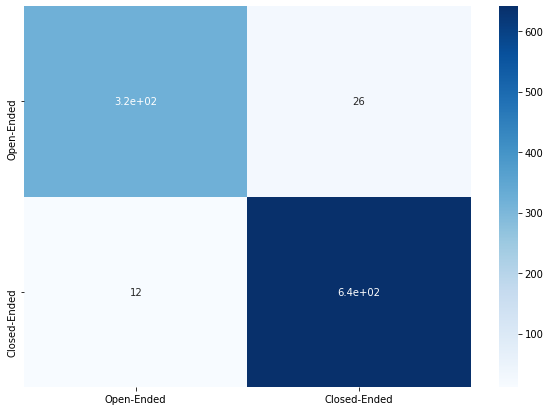

In [42]:
df_cm1 = pd.DataFrame(confusion_matrix1, index = ["Open-Ended", "Closed-Ended"],
                  columns = ["Open-Ended", "Closed-Ended"])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm1, annot=True, cmap="Blues")

# 2 Backward v.s Forward-looking Questions

In [43]:
df_filtered

,call_question_id,question_text,cyear,Open-ended,Closed-ended,Backward-looking,Forward-looking,Financials,Macro,Industry/C ompetition,Operations,Investment/Divestment,ESG
0,JNJ-Q3-2016-Q10,"Good morning, guys. Just a follow-up on REMICA...",2016,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,SMP.N-Q3-2020-Q14,Yes. Just that we've seen significant strength...,2020,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,MTD-Q3-2015-Q48,"Good afternoon guys. Thanks. Bill, just one fo...",2015,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
3,ALYA.TO-Q4-2021-Q7,"Okay. Right. And I guess on that vein, you did...",2021,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,CLI-Q1-2012-Q23,"There's $400 million of mezz, of which you're ...",2012,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SPRO.OQ-Q3-2021-Q8,"Firstly, on the commercial front with tebipene...",2021,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
996,RSPP-Q3-2016-Q35,Sure. And as you move forward into the 2017 pe...,2016,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
997,IDEX.OQ-Q3-2020-Q14,Congratulations. I thought the quarter was ver...,2020,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
998,NCLH-Q2-2018-Q27,"Okay, okay. And gentlemen if I may, one last c...",2018,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [44]:
df2 = df_filtered[["question_text", "Backward-looking", "Forward-looking"]]
df2

,question_text,Backward-looking,Forward-looking
0,"Good morning, guys. Just a follow-up on REMICA...",0.0,1.0
1,Yes. Just that we've seen significant strength...,1.0,0.0
2,"Good afternoon guys. Thanks. Bill, just one fo...",0.0,1.0
3,"Okay. Right. And I guess on that vein, you did...",1.0,0.0
4,"There's $400 million of mezz, of which you're ...",1.0,0.0
...,...,...,...
995,"Firstly, on the commercial front with tebipene...",0.0,1.0
996,Sure. And as you move forward into the 2017 pe...,0.0,1.0
997,Congratulations. I thought the quarter was ver...,0.0,1.0
998,"Okay, okay. And gentlemen if I may, one last c...",1.0,0.0


In [45]:
arr = []
for index, row in df2.iterrows():
    if row[1] == 1:
        arr.append(0)
    else:
        arr.append(1)

In [46]:
df2["label"] = arr

<ipython-input-46-96d0fafecb4c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["label"] = arr


In [47]:
df2 = df2[["question_text", "label"]]
df2

,question_text,label
0,"Good morning, guys. Just a follow-up on REMICA...",1
1,Yes. Just that we've seen significant strength...,0
2,"Good afternoon guys. Thanks. Bill, just one fo...",1
3,"Okay. Right. And I guess on that vein, you did...",0
4,"There's $400 million of mezz, of which you're ...",0
...,...,...
995,"Firstly, on the commercial front with tebipene...",1
996,Sure. And as you move forward into the 2017 pe...,1
997,Congratulations. I thought the quarter was ver...,1
998,"Okay, okay. And gentlemen if I may, one last c...",0


In [48]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [49]:
token = tokenizer.encode_plus(
    df2['question_text'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [50]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  2750,  2106,   117,  3713,   119,  2066,   170,  2812,
          118,  1146,  1113,   155, 15577,  9741, 14569,  2036,  1272,
          117, 11288,   117,  1128,  1163,   155, 15577,  9741, 14569,
         2036,   117,  1137,  1103, 25128,  5053,  3080,  5815,   117,
         2959,   117,  1156,  1129,  1126,   164,  1149, 15554, 11273,
          166,  3187,   119,  1573,  1169,  1128, 11484,  1366,  1184,
          112,   188,  1397,  1107,  1103,  2732,  1965,   136,  1262,
         1173,  1128,  1145,  1225,   170,  1363,  2261,  1104, 10751,
         1103,  3772,  1128,  1354,  1111,  1103,  1499,  1413,   119,
         2825,  1128,  2037,  1164,  1103,  5022,  6328,  1104,   155,
        15577,  9741, 14569,  2036,  2052,   136,  2181,  1142,   170,
         3850,  1115,  1110,  1253,  3777, 11777,   136,   146,  1169,
          112,   189,  5403,  1175,   112,   188,   170,  1974,  1104,
          155,   111,   141, 

In [51]:
X_input_ids = np.zeros((len(df2), 256))
X_attn_masks = np.zeros((len(df2), 256))

In [52]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['question_text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [53]:
X_input_ids, X_attn_masks = generate_training_data(df2, X_input_ids, X_attn_masks, tokenizer)

In [54]:
labels = np.zeros((len(df), 2))
labels.shape

(1000, 2)

In [55]:
labels[np.arange(len(df)), df2['label'].values] = 1
labels

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [56]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(2,), dtype=tf.float64, name=None))>

In [57]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [58]:
dataset = dataset.map(SentimentDatasetMapFunction)

In [59]:
dataset = dataset.shuffle(200).batch(16, drop_remainder=True)

In [60]:
p = 0.8
train_size = int((len(df)//16)*p)

In [61]:
train_size

49

In [62]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [63]:
val_dataset

<SkipDataset element_spec=({'input_ids': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None), 'attention_mask': TensorSpec(shape=(16, 256), dtype=tf.float64, name=None)}, TensorSpec(shape=(16, 2), dtype=tf.float64, name=None))>

In [64]:
model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [65]:
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1]
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(2, activation='softmax', name='output_layer')(intermediate_layer)

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 256                                               
                                , 768),                                                     

In [66]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [67]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [68]:
hist = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

Epoch 1/5
49/49 [==============================] - 530s 11s/step - loss: 0.6094 - accuracy: 0.6607 - val_loss: 0.5052 - val_accuracy: 0.7452
Epoch 2/5
49/49 [==============================] - 505s 10s/step - loss: 0.4532 - accuracy: 0.7793 - val_loss: 0.3514 - val_accuracy: 0.8606
Epoch 3/5
49/49 [==============================] - 507s 10s/step - loss: 0.2477 - accuracy: 0.9171 - val_loss: 0.2403 - val_accuracy: 0.9231
Epoch 4/5
49/49 [==============================] - 503s 10s/step - loss: 0.1473 - accuracy: 0.9541 - val_loss: 0.2515 - val_accuracy: 0.9231
Epoch 5/5
49/49 [==============================] - 503s 10s/step - loss: 0.0881 - accuracy: 0.9770 - val_loss: 0.3025 - val_accuracy: 0.9135


In [69]:
sentiment_model.save('model2')

INFO:tensorflow:Assets written to: model2/assets


INFO:tensorflow:Assets written to: model2/assets


In [70]:
sentiment_model2 = tf.keras.models.load_model('model2')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction2(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

def make_prediction2_pct(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return probs

In [71]:
pred2_arr = []
pred2_pct = []
for text in tqdm(df_filtered["question_text"]):
    a = make_prediction2(sentiment_model2, prepare_data(text, tokenizer))
    pred2_arr.append(a)
    b = make_prediction2_pct(sentiment_model2, prepare_data(text, tokenizer))
    pred2_pct.append(b)
df2["pred"] = pred2_arr

1/1 [==============================] - 0s 301ms/step


1/1 [==============================] - 0s 327ms/step


1/1 [==============================] - 0s 214ms/step


1/1 [==============================] - 0s 207ms/step


1/1 [==============================] - 0s 195ms/step


1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 211ms/step



<ipython-input-71-6382daa69270>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["pred"] = pred2_arr


In [72]:
df2

,question_text,label,pred
0,"Good morning, guys. Just a follow-up on REMICA...",1,1
1,Yes. Just that we've seen significant strength...,0,0
2,"Good afternoon guys. Thanks. Bill, just one fo...",1,1
3,"Okay. Right. And I guess on that vein, you did...",0,0
4,"There's $400 million of mezz, of which you're ...",0,0
...,...,...,...
995,"Firstly, on the commercial front with tebipene...",1,1
996,Sure. And as you move forward into the 2017 pe...,1,1
997,Congratulations. I thought the quarter was ver...,1,1
998,"Okay, okay. And gentlemen if I may, one last c...",0,1


In [73]:
back_arr = []
forward_arr = []

for i in pred2_pct:
    back_arr.append(i[0])
    forward_arr.append(i[1])
    
df2["Backward-Looking%"] = back_arr
df2["Forward-Looking%"] = forward_arr

In [74]:
df2

,question_text,label,pred,Backward-Looking%,Forward-Looking%
0,"Good morning, guys. Just a follow-up on REMICA...",1,1,0.010787,0.989213
1,Yes. Just that we've seen significant strength...,0,0,0.972538,0.027462
2,"Good afternoon guys. Thanks. Bill, just one fo...",1,1,0.010664,0.989336
3,"Okay. Right. And I guess on that vein, you did...",0,0,0.986013,0.013987
4,"There's $400 million of mezz, of which you're ...",0,0,0.921744,0.078256
...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",1,1,0.035109,0.964891
996,Sure. And as you move forward into the 2017 pe...,1,1,0.010985,0.989015
997,Congratulations. I thought the quarter was ver...,1,1,0.006313,0.993687
998,"Okay, okay. And gentlemen if I may, one last c...",0,1,0.006015,0.993985


In [75]:
df2["label"] = df2["label"].map({0: "Backward-Looking", 1: "Forward-Looking"})
df2["pred"] = df2["pred"].map({0: "Backward-Looking", 1: "Forward-Looking"})
df2

,question_text,label,pred,Backward-Looking%,Forward-Looking%
0,"Good morning, guys. Just a follow-up on REMICA...",Forward-Looking,Forward-Looking,0.010787,0.989213
1,Yes. Just that we've seen significant strength...,Backward-Looking,Backward-Looking,0.972538,0.027462
2,"Good afternoon guys. Thanks. Bill, just one fo...",Forward-Looking,Forward-Looking,0.010664,0.989336
3,"Okay. Right. And I guess on that vein, you did...",Backward-Looking,Backward-Looking,0.986013,0.013987
4,"There's $400 million of mezz, of which you're ...",Backward-Looking,Backward-Looking,0.921744,0.078256
...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",Forward-Looking,Forward-Looking,0.035109,0.964891
996,Sure. And as you move forward into the 2017 pe...,Forward-Looking,Forward-Looking,0.010985,0.989015
997,Congratulations. I thought the quarter was ver...,Forward-Looking,Forward-Looking,0.006313,0.993687
998,"Okay, okay. And gentlemen if I may, one last c...",Backward-Looking,Forward-Looking,0.006015,0.993985


In [76]:
df2.to_excel(r'df2_pct.xlsx', index=False)

In [77]:
confusion_matrix2 = metrics.confusion_matrix(df2["label"].to_list(), df2["pred"].to_list(), labels = ["Backward-Looking", "Forward-Looking"])

<AxesSubplot: >

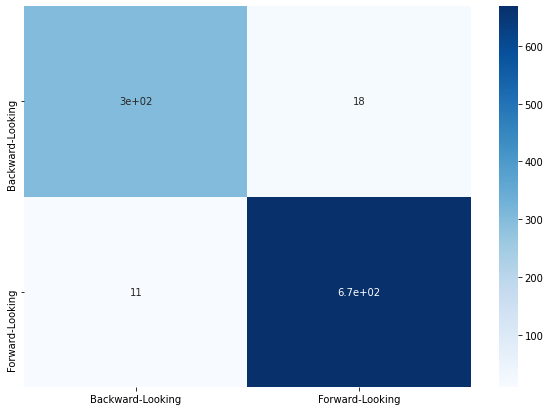

In [78]:
df2_cm = pd.DataFrame(confusion_matrix2, index = ["Backward-Looking", "Forward-Looking"],
                  columns = ["Backward-Looking", "Forward-Looking"])
plt.figure(figsize = (10,7))
sns.heatmap(df2_cm, annot=True, cmap="Blues")

# 3 Analyst Questions Topic Classification

In [79]:
df_filtered3 = df_filtered[["question_text", "Financials", "Macro", "Industry/C ompetition", "Operations", "Investment/Divestment", "ESG"]]
df_filtered3 = df_filtered3.rename(columns={"Industry/C ompetition":"Industry/Competition"})
df_filtered3

,question_text,Financials,Macro,Industry/Competition,Operations,Investment/Divestment,ESG
0,"Good morning, guys. Just a follow-up on REMICA...",0.0,0.0,0.0,0.0,0.0,1.0
1,Yes. Just that we've seen significant strength...,1.0,0.0,0.0,0.0,0.0,0.0
2,"Good afternoon guys. Thanks. Bill, just one fo...",1.0,0.0,0.0,0.0,0.0,0.0
3,"Okay. Right. And I guess on that vein, you did...",0.0,0.0,0.0,1.0,0.0,0.0
4,"There's $400 million of mezz, of which you're ...",1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",0.0,0.0,1.0,0.0,0.0,0.0
996,Sure. And as you move forward into the 2017 pe...,0.0,0.0,0.0,0.0,1.0,0.0
997,Congratulations. I thought the quarter was ver...,0.0,1.0,0.0,0.0,0.0,0.0
998,"Okay, okay. And gentlemen if I may, one last c...",0.0,0.0,0.0,1.0,0.0,0.0


In [80]:
arr = []
for index, row in df_filtered3.iterrows():
    if row[1] == 1:
        arr.append(0)
    elif row[2] == 1:
        arr.append(1)
    elif row[3] == 1:
        arr.append(2)
    elif row[4] == 1:
        arr.append(3)
    elif row[5] == 1:
        arr.append(4)
    elif row[6] == 1:
        arr.append(5)

In [81]:
df_filtered3["label"] = arr
df3 = df_filtered3[["question_text", "label"]]
df3

,question_text,label
0,"Good morning, guys. Just a follow-up on REMICA...",5
1,Yes. Just that we've seen significant strength...,0
2,"Good afternoon guys. Thanks. Bill, just one fo...",0
3,"Okay. Right. And I guess on that vein, you did...",3
4,"There's $400 million of mezz, of which you're ...",0
...,...,...
995,"Firstly, on the commercial front with tebipene...",2
996,Sure. And as you move forward into the 2017 pe...,4
997,Congratulations. I thought the quarter was ver...,1
998,"Okay, okay. And gentlemen if I may, one last c...",3


In [82]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   question_text  1000 non-null   object
 1   label          1000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [83]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

In [84]:
token = tokenizer.encode_plus(
    df3['question_text'].iloc[0], 
    max_length=256, 
    truncation=True, 
    padding='max_length', 
    add_special_tokens=True,
    return_tensors='tf'
)

In [85]:
token.input_ids

<tf.Tensor: shape=(1, 256), dtype=int32, numpy=
array([[  101,  2750,  2106,   117,  3713,   119,  2066,   170,  2812,
          118,  1146,  1113,   155, 15577,  9741, 14569,  2036,  1272,
          117, 11288,   117,  1128,  1163,   155, 15577,  9741, 14569,
         2036,   117,  1137,  1103, 25128,  5053,  3080,  5815,   117,
         2959,   117,  1156,  1129,  1126,   164,  1149, 15554, 11273,
          166,  3187,   119,  1573,  1169,  1128, 11484,  1366,  1184,
          112,   188,  1397,  1107,  1103,  2732,  1965,   136,  1262,
         1173,  1128,  1145,  1225,   170,  1363,  2261,  1104, 10751,
         1103,  3772,  1128,  1354,  1111,  1103,  1499,  1413,   119,
         2825,  1128,  2037,  1164,  1103,  5022,  6328,  1104,   155,
        15577,  9741, 14569,  2036,  2052,   136,  2181,  1142,   170,
         3850,  1115,  1110,  1253,  3777, 11777,   136,   146,  1169,
          112,   189,  5403,  1175,   112,   188,   170,  1974,  1104,
          155,   111,   141, 

In [86]:
X_input_ids = np.zeros((len(df3), 256))
X_attn_masks = np.zeros((len(df3), 256))

In [87]:
def generate_training_data(df, ids, masks, tokenizer):
    for i, text in tqdm(enumerate(df['question_text'])):
        tokenized_text = tokenizer.encode_plus(
            text,
            max_length=256, 
            truncation=True, 
            padding='max_length', 
            add_special_tokens=True,
            return_tensors='tf'
        )
        ids[i, :] = tokenized_text.input_ids
        masks[i, :] = tokenized_text.attention_mask
    return ids, masks

In [88]:
X_input_ids, X_attn_masks = generate_training_data(df3, X_input_ids, X_attn_masks, tokenizer)

In [89]:
labels = np.zeros((len(df3), 6))
labels.shape

(1000, 6)

In [90]:
labels[np.arange(len(df3)), df3['label'].values] = 1
labels

array([[0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.]])

In [91]:
dataset = tf.data.Dataset.from_tensor_slices((X_input_ids, X_attn_masks, labels))
dataset.take(1)

<TakeDataset element_spec=(TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(256,), dtype=tf.float64, name=None), TensorSpec(shape=(6,), dtype=tf.float64, name=None))>

In [92]:
def SentimentDatasetMapFunction(input_ids, attn_masks, labels):
    return {
        'input_ids': input_ids,
        'attention_mask': attn_masks
    }, labels

In [93]:
dataset = dataset.map(SentimentDatasetMapFunction)

In [94]:
dataset = dataset.shuffle(100).batch(16, drop_remainder=True)

In [95]:
p = 0.8
train_size = int((len(df3)//16)*p)

In [96]:
train_size

49

In [97]:
train_dataset = dataset.take(train_size)
val_dataset = dataset.skip(train_size)

In [98]:
model = TFBertModel.from_pretrained('bert-base-cased')

Some layers from the model checkpoint at bert-base-cased were not used when initializing TFBertModel: ['mlm___cls', 'nsp___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-cased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [99]:
input_ids = tf.keras.layers.Input(shape=(256,), name='input_ids', dtype='int32')
attn_masks = tf.keras.layers.Input(shape=(256,), name='attention_mask', dtype='int32')

bert_embds = model.bert(input_ids, attention_mask=attn_masks)[1]
intermediate_layer = tf.keras.layers.Dense(512, activation='relu', name='intermediate_layer')(bert_embds)
output_layer = tf.keras.layers.Dense(6, activation='softmax', name='output_layer')(intermediate_layer)

sentiment_model = tf.keras.Model(inputs=[input_ids, attn_masks], outputs=output_layer)
sentiment_model.summary()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_ids (InputLayer)         [(None, 256)]        0           []                               
                                                                                                  
 attention_mask (InputLayer)    [(None, 256)]        0           []                               
                                                                                                  
 bert (TFBertMainLayer)         TFBaseModelOutputWi  108310272   ['input_ids[0][0]',              
                                thPooling(last_hidd               'attention_mask[0][0]']         
                                en_state=(None, 256                                               
                                , 768),                                                     

In [100]:
optim = tf.keras.optimizers.legacy.Adam(learning_rate=1e-5, decay=1e-6)
loss_func = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

In [101]:
sentiment_model.compile(optimizer=optim, loss=loss_func, metrics=[acc])

In [102]:
hist = sentiment_model.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5
)

Epoch 1/5
49/49 [==============================] - 509s 10s/step - loss: 1.3478 - accuracy: 0.4184 - val_loss: 1.2605 - val_accuracy: 0.4856
Epoch 2/5
49/49 [==============================] - 501s 10s/step - loss: 1.2007 - accuracy: 0.5242 - val_loss: 1.1673 - val_accuracy: 0.6298
Epoch 3/5
49/49 [==============================] - 503s 10s/step - loss: 1.0470 - accuracy: 0.6339 - val_loss: 1.0310 - val_accuracy: 0.6538
Epoch 4/5
49/49 [==============================] - 503s 10s/step - loss: 0.8736 - accuracy: 0.7168 - val_loss: 1.0634 - val_accuracy: 0.6394
Epoch 5/5
49/49 [==============================] - 499s 10s/step - loss: 0.7375 - accuracy: 0.7730 - val_loss: 0.8874 - val_accuracy: 0.7115


In [103]:
sentiment_model.save('model3')

INFO:tensorflow:Assets written to: model3/assets


INFO:tensorflow:Assets written to: model3/assets


In [104]:
sentiment_model3 = tf.keras.models.load_model('model3')

tokenizer = BertTokenizer.from_pretrained('bert-base-cased')

def prepare_data(input_text, tokenizer):
    token = tokenizer.encode_plus(
        input_text,
        max_length=256, 
        truncation=True, 
        padding='max_length', 
        add_special_tokens=True,
        return_tensors='tf'
    )
    return {
        'input_ids': tf.cast(token.input_ids, tf.float64),
        'attention_mask': tf.cast(token.attention_mask, tf.float64)
    }

def make_prediction3(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return classes[np.argmax(probs)]

def make_prediction3_arr(model, processed_data, classes=[0, 1, 2, 3, 4, 5]):
    probs = model.predict(processed_data)[0]
    return probs

In [105]:
string_test = df3.iloc[1,0]
string_test

"Yes. Just that we've seen significant strength in e-tailing, just seeing if that affects your business in any way."

In [106]:
make_prediction3(sentiment_model3, prepare_data(string_test, tokenizer))

1/1 [==============================] - 2s 2s/step


3

In [107]:
make_prediction3_arr(sentiment_model3, prepare_data(string_test, tokenizer))

1/1 [==============================] - 0s 216ms/step


array([0.19587867, 0.05359174, 0.03708444, 0.61527246, 0.079233  ,
       0.01893973], dtype=float32)

In [108]:
pred3_arr = []
pred3_pct = []
for text in tqdm(df_filtered["question_text"]):
    a = make_prediction3(sentiment_model3, prepare_data(text, tokenizer))
    pred3_arr.append(a)
    b = make_prediction3_arr(sentiment_model3, prepare_data(text, tokenizer))
    pred3_pct.append(b)
df3["pred"] = pred3_arr

1/1 [==============================] - 0s 253ms/step


1/1 [==============================] - 0s 278ms/step


1/1 [==============================] - 0s 201ms/step


1/1 [==============================] - 0s 231ms/step


1/1 [==============================] - 0s 202ms/step


1/1 [==============================] - 0s 206ms/step


1/1 [==============================] - 0s 207ms/step



<ipython-input-108-39624370b4ad>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["pred"] = pred3_arr


In [109]:
pred3_pct

[array([0.02928195, 0.01666668, 0.05449715, 0.8100077 , 0.07815368,
        0.01139283], dtype=float32),
 array([0.19587867, 0.05359174, 0.03708444, 0.61527246, 0.079233  ,
        0.01893973], dtype=float32),
 array([0.94694936, 0.01755806, 0.00726594, 0.01542715, 0.00813523,
        0.00466421], dtype=float32),
 array([0.09024376, 0.02420053, 0.03852509, 0.78455067, 0.04934822,
        0.01313174], dtype=float32),
 array([0.9293002 , 0.02894409, 0.01007368, 0.01421413, 0.01131521,
        0.00615264], dtype=float32),
 array([0.03480542, 0.02680415, 0.11176265, 0.6325664 , 0.17788228,
        0.01617906], dtype=float32),
 array([0.92106056, 0.02539379, 0.00913715, 0.02242074, 0.01524739,
        0.00674035], dtype=float32),
 array([0.94451296, 0.02261224, 0.00645143, 0.01144725, 0.00746974,
        0.00750636], dtype=float32),
 array([0.9453708 , 0.02103033, 0.00821779, 0.00935184, 0.00861061,
        0.00741864], dtype=float32),
 array([0.47798   , 0.03978468, 0.02542357, 0.3811559 ,

In [110]:
{0: "Financials", 1: "Macro", 2: "Industry/Competition", 3: "Operations", 4: "Investment/Divestment", 5: "ESG"}

{0: 'Financials',
 1: 'Macro',
 2: 'Industry/Competition',
 3: 'Operations',
 4: 'Investment/Divestment',
 5: 'ESG'}

In [111]:
fin_pct = []
macro_pct = []
indus_pct = []
op_pct = []
inv_pct = []
esg_pct = []
for i in pred3_pct:
    fin_pct.append(i[0])
    macro_pct.append(i[1])
    indus_pct.append(i[2])
    op_pct.append(i[3])
    inv_pct.append(i[4])
    esg_pct.append(i[5])
    
df3["Financial%"] = fin_pct
df3["Macro%"] = macro_pct
df3["Industry/Competition%"] = indus_pct
df3["Operations%"] = op_pct
df3["Investment/Divestment%"] = inv_pct
df3["ESG%"] = esg_pct

df3

<ipython-input-111-fa075ef55b44>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Financial%"] = fin_pct
<ipython-input-111-fa075ef55b44>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3["Macro%"] = macro_pct
<ipython-input-111-fa075ef55b44>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.htm

,question_text,label,pred,Financial%,Macro%,Industry/Competition%,Operations%,Investment/Divestment%,ESG%
0,"Good morning, guys. Just a follow-up on REMICA...",5,3,0.029282,0.016667,0.054497,0.810008,0.078154,0.011393
1,Yes. Just that we've seen significant strength...,0,3,0.195879,0.053592,0.037084,0.615272,0.079233,0.018940
2,"Good afternoon guys. Thanks. Bill, just one fo...",0,0,0.946949,0.017558,0.007266,0.015427,0.008135,0.004664
3,"Okay. Right. And I guess on that vein, you did...",3,3,0.090244,0.024201,0.038525,0.784551,0.049348,0.013132
4,"There's $400 million of mezz, of which you're ...",0,0,0.929300,0.028944,0.010074,0.014214,0.011315,0.006153
...,...,...,...,...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",2,3,0.067938,0.019104,0.049074,0.785017,0.066605,0.012262
996,Sure. And as you move forward into the 2017 pe...,4,3,0.025604,0.015459,0.055399,0.794797,0.096399,0.012343
997,Congratulations. I thought the quarter was ver...,1,3,0.063162,0.019094,0.044847,0.791836,0.070393,0.010669
998,"Okay, okay. And gentlemen if I may, one last c...",3,3,0.052350,0.017568,0.037803,0.826715,0.054160,0.011405


In [112]:
df3["label"] = df3["label"].map({0: "Financials", 1: "Macro", 2: "Industry/Competition", 3: "Operations", 4: "Investment/Divestment", 5: "ESG"})
df3["pred"] = df3["pred"].map({0: "Financials", 1: "Macro", 2: "Industry/Competition", 3: "Operations", 4: "Investment/Divestment", 5: "ESG"})

df3

,question_text,label,pred,Financial%,Macro%,Industry/Competition%,Operations%,Investment/Divestment%,ESG%
0,"Good morning, guys. Just a follow-up on REMICA...",ESG,Operations,0.029282,0.016667,0.054497,0.810008,0.078154,0.011393
1,Yes. Just that we've seen significant strength...,Financials,Operations,0.195879,0.053592,0.037084,0.615272,0.079233,0.018940
2,"Good afternoon guys. Thanks. Bill, just one fo...",Financials,Financials,0.946949,0.017558,0.007266,0.015427,0.008135,0.004664
3,"Okay. Right. And I guess on that vein, you did...",Operations,Operations,0.090244,0.024201,0.038525,0.784551,0.049348,0.013132
4,"There's $400 million of mezz, of which you're ...",Financials,Financials,0.929300,0.028944,0.010074,0.014214,0.011315,0.006153
...,...,...,...,...,...,...,...,...,...
995,"Firstly, on the commercial front with tebipene...",Industry/Competition,Operations,0.067938,0.019104,0.049074,0.785017,0.066605,0.012262
996,Sure. And as you move forward into the 2017 pe...,Investment/Divestment,Operations,0.025604,0.015459,0.055399,0.794797,0.096399,0.012343
997,Congratulations. I thought the quarter was ver...,Macro,Operations,0.063162,0.019094,0.044847,0.791836,0.070393,0.010669
998,"Okay, okay. And gentlemen if I may, one last c...",Operations,Operations,0.052350,0.017568,0.037803,0.826715,0.054160,0.011405


In [113]:
df3.to_excel(r'df3_pct.xlsx', index=False)

In [114]:
confusion_matrix3 = metrics.confusion_matrix(df3["label"].to_list(), df3["pred"].to_list(), labels = ["Financials", "Macro", "Industry/Competition", "Operations", "Investment/Divestment", "ESG"])
confusion_matrix3

array([[456,   0,   0,  31,   0,   0],
       [ 11,   0,   0,  16,   0,   0],
       [  5,   0,   0,  43,   0,   0],
       [ 11,   0,   0, 341,   0,   0],
       [  5,   0,   0,  66,   1,   0],
       [  0,   0,   0,  14,   0,   0]])

<AxesSubplot: >

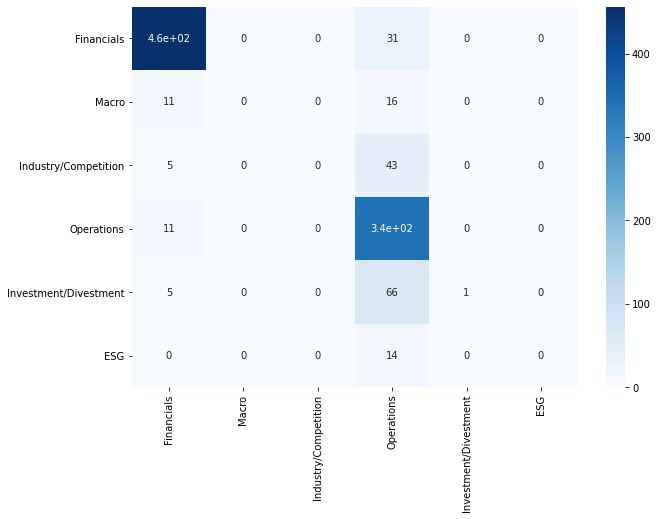

In [115]:
df_cm3 = pd.DataFrame(confusion_matrix3, index = ["Financials", "Macro", "Industry/Competition", "Operations", "Investment/Divestment", "ESG"],
                  columns = ["Financials", "Macro", "Industry/Competition", "Operations", "Investment/Divestment", "ESG"])
plt.figure(figsize = (10,7))
sns.color_palette("tab10")
sns.heatmap(df_cm3, annot=True, cmap="Blues")